In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import json
import numpy as np

In [34]:
from conformity import attribute_conformity

G = nx.read_gexf('./data/rpolitics/giant_component.gexf')

In [ ]:
eigenvector = nx.eigenvector_centrality(G, weight='weight', max_iter=1000)
with open('./results/rpolitics/centrality_eigenvector.json', 'w') as file:
    json.dump(eigenvector, file, indent=4)

pagerank = nx.pagerank(G, weight='weight', max_iter=1000)
with open('./results/rpolitics/centrality_pagerank.json', 'w') as file:
    json.dump(pagerank, file, indent=4)

ass_coefficient = nx.attribute_assortativity_coefficient(G, 'geo')
with open('./results/rpolitics/assortativity_geo.json', 'w') as file:
    json.dump(ass_coefficient, file, indent=4)

In [14]:
print(ass_coefficient)

0.007713760687206258


In [18]:
eigen = pd.read_json('./results/rpolitics/centrality_eigenvector.json',orient = 'index').reset_index()
pagerank = pd.read_json('./results/rpolitics/centrality_pagerank.json',orient = 'index').reset_index()
eigen.rename(columns={'index':'Name',0:'eigen'},inplace=True)
pagerank.rename(columns={'index':'Name',0:'pagerank'},inplace=True)
centralities = eigen.set_index('Name').join(pagerank.set_index('Name'))

In [35]:
karma_dict = {}
link_dict = {}
for node in G.nodes():
  karma_dict[node] = json.loads(G.nodes[node]['data'].replace("'",'"'))['comment_karma']
  link_dict[node] = json.loads(G.nodes[node]['data'].replace("'",'"'))['link_karma']

In [20]:
comment = pd.DataFrame.from_dict(karma_dict,orient='index',columns=['comment_karma'])
centralities = centralities.join(comment)

In [21]:
centralities.describe()

,eigen,pagerank
count,9.516800e+04,95168.000000
mean,3.186167e-04,0.000011
std,3.225884e-03,0.000093
min,1.763368e-19,0.000002
25%,1.976911e-06,0.000002
50%,2.278971e-05,0.000003
75%,8.342333e-05,0.000006
max,6.795717e-01,0.023827


In [22]:
print('Pearson')
print(centralities.corr(method='pearson'))
print('Kendall')
print(centralities.corr(method='kendall'))
print('Spearman')
print(centralities.corr(method='spearman'))

Pearson
             eigen  pagerank
eigen     1.000000  0.884907
pagerank  0.884907  1.000000
Kendall
             eigen  pagerank
eigen     1.000000  0.263466
pagerank  0.263466  1.000000
Spearman
             eigen  pagerank
eigen     1.000000  0.394572
pagerank  0.394572  1.000000


# Eigenvector

(0.0, 0.001)

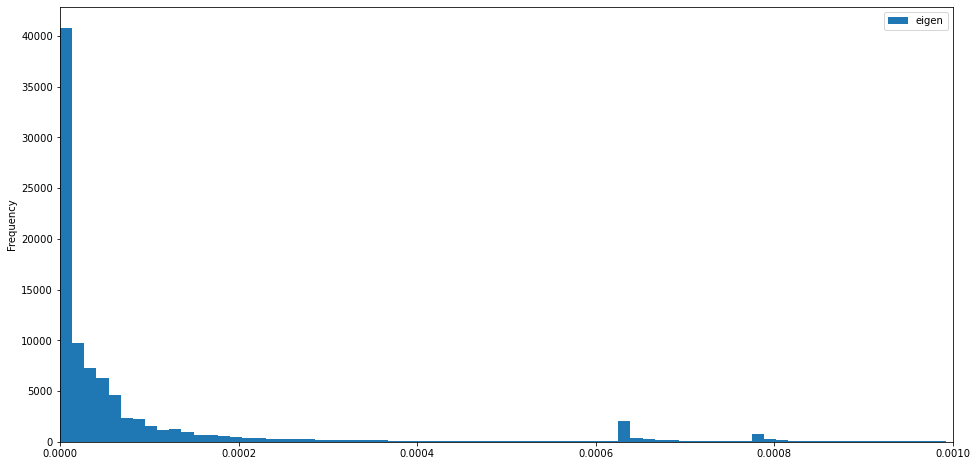

In [23]:
eigen.plot.hist(by='eigen',bins=50000, figsize = (16,8))
plt.gca().set_xlim(0,0.001)
#plt.gca().set_ylim(0,10000)

(0.0, 5000.0)

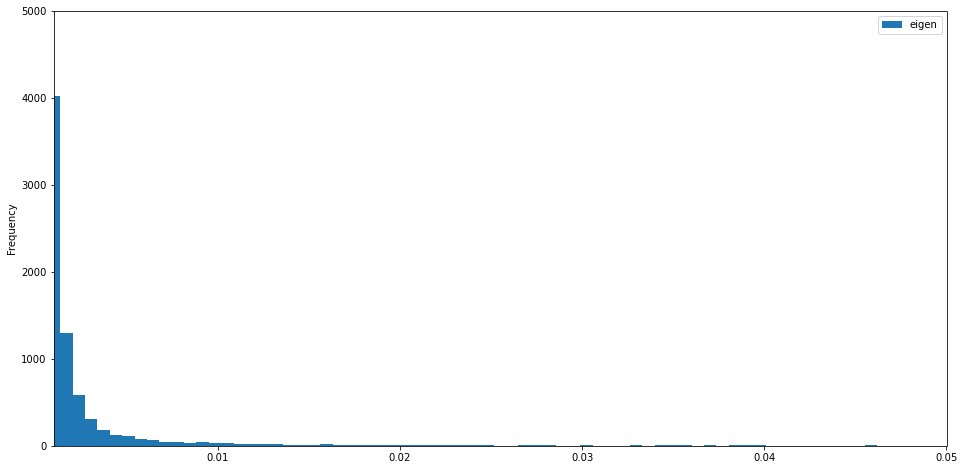

In [24]:
eigen.plot.hist(by='eigen',bins=1000, figsize = (16,8))
plt.gca().set_xlim(0.001,0.05)
plt.gca().set_ylim(0,5000)

<AxesSubplot:>

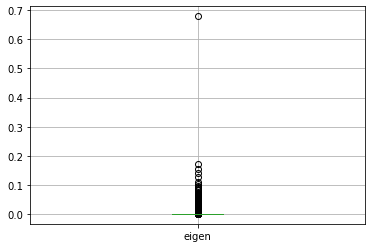

In [25]:
eigen.boxplot(column="eigen")


# PageRank

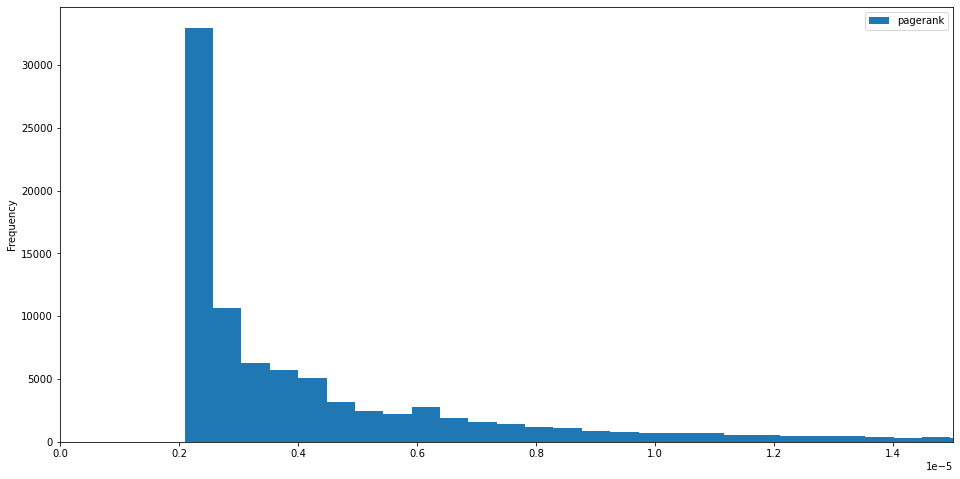

In [26]:
pagerank.plot.hist(by='pagerank',bins=50000, figsize = (16,8))
plt.gca().set_xlim(0,0.000015)
plt.savefig('pagerank.pdf')
#plt.gca().set_ylim(0,10000)

(0.0, 40.0)

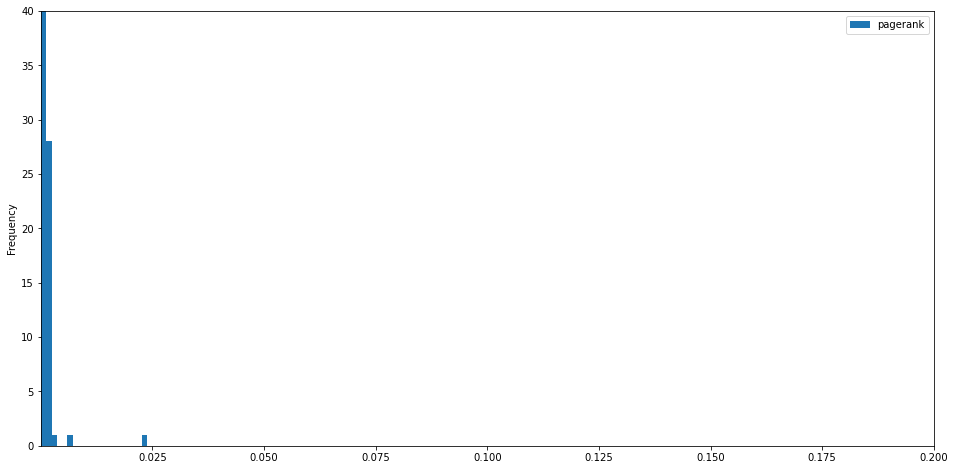

In [27]:
pagerank.plot.hist(by='pagerank',bins=20, figsize = (16,8))
plt.gca().set_xlim(0.000015,0.2)
plt.gca().set_ylim(0,40)

<AxesSubplot:>

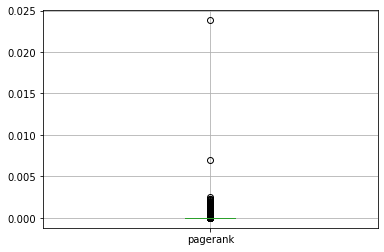

In [28]:
pagerank.boxplot(column="pagerank")

# Most Influential Users

In [38]:
num_ex = 20

In [39]:
sorted_eigen = eigen.sort_values(by='eigen',ascending=False)[0:num_ex]

In [40]:
sorted_pagerank = pagerank.sort_values(by='pagerank',ascending=False)[0:num_ex]

In [41]:
choosen_users = sorted_eigen.join(sorted_pagerank,lsuffix='eigen', how="inner")

In [42]:
choosen_users

,Nameeigen,eigen,Name,pagerank
3,t2_6l4z3,0.679572,t2_6l4z3,0.023827
1,t2_onl9u,0.155174,t2_onl9u,0.006991
619,t2_2s9e8jwa,0.140812,t2_2s9e8jwa,0.002258
5757,t2_b6kcx,0.096944,t2_b6kcx,0.001534
599,t2_wwj7h,0.090285,t2_wwj7h,0.001818
5189,t2_2t20j72x,0.069180,t2_2t20j72x,0.002321
6222,t2_y8mbk,0.067534,t2_y8mbk,0.001487
